In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-preprocessed/X_train
/kaggle/input/titanic-preprocessed/X_test
/kaggle/input/titanic-preprocessed/y_train


In [2]:
X_train = pd.read_csv(os.path.join(dirname, filenames[0]))
X_test = pd.read_csv(os.path.join(dirname, filenames[1]))
y_train = pd.read_csv(os.path.join(dirname, filenames[2]))

In [3]:
X_train.set_index('PassengerId', inplace = True)
y_train.set_index('PassengerId', inplace = True)
X_test.set_index('PassengerId', inplace = True)

y_train.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt

In [5]:
y = y_train['Survived']

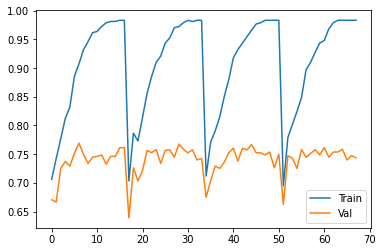

In [6]:
xtrn, xval, ytrn, yval = train_test_split(X_train, y, test_size = 0.3, stratify = y)

f1_trn = []
f1_val = []

itr = 0

param_ne = []
param_md = []

for ne in range(50,250,50):
    for md in range(3,20):
    
        rf = RandomForestClassifier(n_estimators = ne, max_depth=md)
        
        #rf = RandomForestClassifier(n_estimators = ne)
        #rf = RandomForestClassifier(max_depth=md)
        rf.fit(xtrn,ytrn)

        ypred = rf.predict(xtrn)
        f1_trn.append(f1_score(ytrn, ypred))

        ypred = rf.predict(xval)
        f1_val.append(f1_score(yval, ypred))

        param_ne.append(ne)
        param_md.append(md)

        itr +=1


plt.plot(f1_trn)
plt.plot(f1_val)
plt.legend(['Train','Val'])



In [7]:
md = int(param_md[np.argmax(f1_val)])
ne = int(param_ne[np.argmax(f1_val)])
rf = RandomForestClassifier(n_estimators = ne,max_depth=md)
rf.fit(xtrn,ytrn)
ypred = rf.predict(xval)
    
cm = confusion_matrix(yval, ypred)

print(cm, ne, md)

[[149  16]
 [ 26  77]] 50 9


In [8]:
rf = RandomForestClassifier(n_estimators = ne,max_depth=md)
rf.fit(X_train,y)
ypred = rf.predict(X_test)

rf_pred = pd.DataFrame()
rf_pred['PassengerId'] = X_test.index
rf_pred.set_index( 'PassengerId', inplace = True)
rf_pred['Survived'] = ypred
rf_pred.head()


rf_pred.to_csv(r'Prediction_rf.csv')

[[156   9]
 [ 27  76]] 200 5


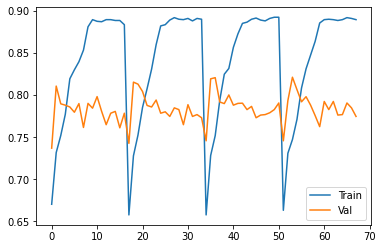

In [9]:
#No fare
xtrn, xval, ytrn, yval = train_test_split(X_train.drop(columns=['Fare Imp']), y, test_size = 0.3, stratify = y)

f1_trn = []
f1_val = []

itr = 0

param_ne = []
param_md = []

for ne in range(50,250,50):
    for md in range(3,20):
    
        rf = RandomForestClassifier(n_estimators = ne, max_depth=md)
        
        #rf = RandomForestClassifier(n_estimators = ne)
        #rf = RandomForestClassifier(max_depth=md)
        rf.fit(xtrn,ytrn)

        ypred = rf.predict(xtrn)
        f1_trn.append(f1_score(ytrn, ypred))

        ypred = rf.predict(xval)
        f1_val.append(f1_score(yval, ypred))

        param_ne.append(ne)
        param_md.append(md)

        itr +=1


plt.plot(f1_trn)
plt.plot(f1_val)
plt.legend(['Train','Val'])

md = int(param_md[np.argmax(f1_val)])
ne = int(param_ne[np.argmax(f1_val)])
rf = RandomForestClassifier(n_estimators = ne,max_depth=md)
rf.fit(xtrn,ytrn)
ypred = rf.predict(xval)
    
cm = confusion_matrix(yval, ypred)

print(cm, ne, md)

In [10]:
rf = RandomForestClassifier(n_estimators = ne,max_depth=md)
rf.fit(X_train.drop(columns=['Fare Imp']),y)
ypred = rf.predict(X_test.drop(columns=['Fare Imp']))

rf_pred = pd.DataFrame()
rf_pred['PassengerId'] = X_test.index
rf_pred.set_index( 'PassengerId', inplace = True)
rf_pred['Survived'] = ypred
rf_pred.head()


rf_pred.to_csv(r'Prediction_rf1.csv')

[[152  13]
 [ 45  58]] 100 4


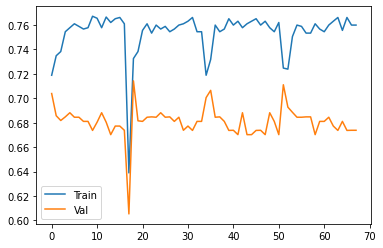

In [11]:
#No fare, age
xtrn, xval, ytrn, yval = train_test_split(X_train.drop(columns=['Fare Imp','Age Imp']), y, test_size = 0.3, stratify = y)

f1_trn = []
f1_val = []

itr = 0

param_ne = []
param_md = []

for ne in range(50,250,50):
    for md in range(3,20):
    
        rf = RandomForestClassifier(n_estimators = ne, max_depth=md)
        
        #rf = RandomForestClassifier(n_estimators = ne)
        #rf = RandomForestClassifier(max_depth=md)
        rf.fit(xtrn,ytrn)

        ypred = rf.predict(xtrn)
        f1_trn.append(f1_score(ytrn, ypred))

        ypred = rf.predict(xval)
        f1_val.append(f1_score(yval, ypred))

        param_ne.append(ne)
        param_md.append(md)

        itr +=1


plt.plot(f1_trn)
plt.plot(f1_val)
plt.legend(['Train','Val'])

md = int(param_md[np.argmax(f1_val)])
ne = int(param_ne[np.argmax(f1_val)])
rf = RandomForestClassifier(n_estimators = ne,max_depth=md)
rf.fit(xtrn,ytrn)
ypred = rf.predict(xval)
    
cm = confusion_matrix(yval, ypred)

print(cm, ne, md)

In [12]:
rf = RandomForestClassifier(n_estimators = ne,max_depth=md)
rf.fit(X_train.drop(columns=['Fare Imp','Age Imp']),y)
ypred = rf.predict(X_test.drop(columns=['Fare Imp','Age Imp']))

rf_pred = pd.DataFrame()
rf_pred['PassengerId'] = X_test.index
rf_pred.set_index( 'PassengerId', inplace = True)
rf_pred['Survived'] = ypred
rf_pred.head()


rf_pred.to_csv(r'Prediction_rf2.csv')